In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [7]:
# Define a function to plot the data
def plot_data(geodata, title, column='Accident_Severity'):
    fig, ax = plt.subplots(figsize=(10, 10))
    geodata.plot(ax=ax, column=column, legend=True, cmap='OrRd', markersize=5)
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

### Using a map with borders

In [22]:
# Load base map of the UK from the downloaded Natural Earth shapefile
# Replace with the actual path to the Natural Earth shapefile
natural_earth_shapefile_path = '../data/boundries/ne_110m_admin_0_countries.shp'
uk_map = gpd.read_file(natural_earth_shapefile_path)
print(uk_map.columns)
#uk_map = uk_map[(uk_map.name == 'United Kingdom')]
# Filter for the United Kingdom using the correct column name
uk_map = uk_map[uk_map['ADMIN'] == 'United Kingdom']

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [23]:
# Load a detailed shapefile for UK sub-regions (e.g., Local Authority Districts, regions)
# Replace with the actual path to your ESRI shapefile
shapefile_path = '../data/county/county_region.shp'
uk_subregions = gpd.read_file(shapefile_path)

## Only Data Loading state for Raw Data should be used

In [24]:
# Load raw data
raw_data = pd.read_csv('../data/raw/Accident_Information.csv')
raw_data = raw_data.dropna(subset=['Longitude', 'Latitude'])
raw_data['geometry'] = raw_data.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
raw_geodata = gpd.GeoDataFrame(raw_data, geometry='geometry')

C:\Users\1998a\AppData\Local\Temp\ipykernel_31300\1292074666.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('../data/raw/Accident_Information.csv')


In [25]:
# Function to plot data on the UK map with sub-region borders
def plot_on_uk_map_with_subregions(geodata, uk_map, title, column):
    fig, ax = plt.subplots(figsize=(10, 10))
    uk_map.plot(ax=ax, color='lightgrey', edgecolor='black')
    #uk_subregions.plot(ax=ax, color='none', edgecolor='blue')  # Highlight sub-region boundaries
    geodata.plot(ax=ax, column=column, legend=True, cmap='OrRd', markersize=5, alpha=0.6)
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

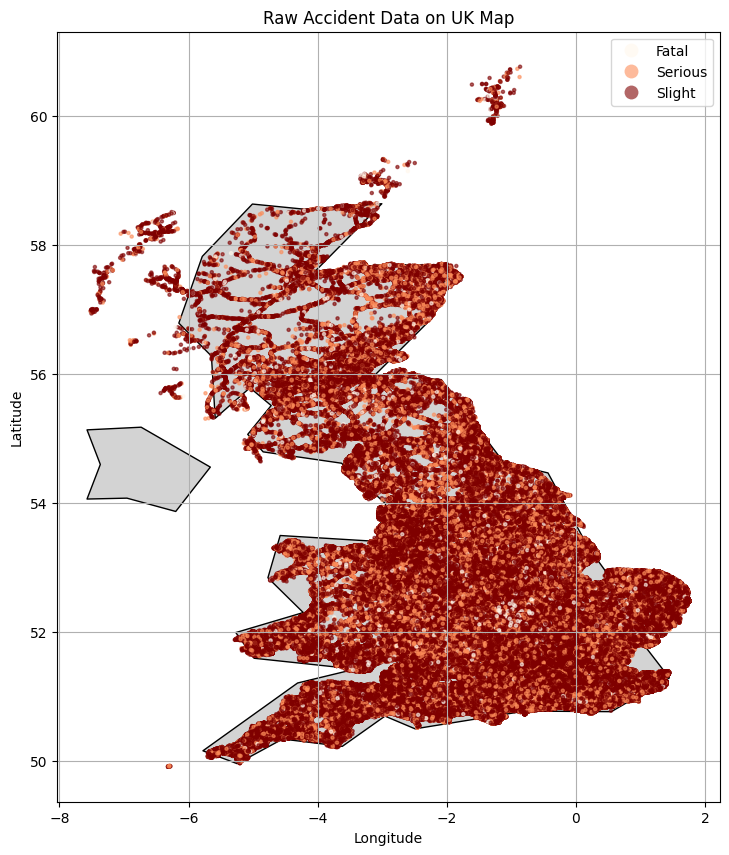

In [ ]:
# Plot raw data on UK map with sub-region borders
#plot_on_uk_map_with_subregions(raw_geodata, uk_map, 'Raw Accident Data on UK Map', 'Accident_Severity')

### Polling districts England

In [26]:
shapefile_path = '../data/Distribution/Districts.shp'
uk_subregions = gpd.read_file(shapefile_path)

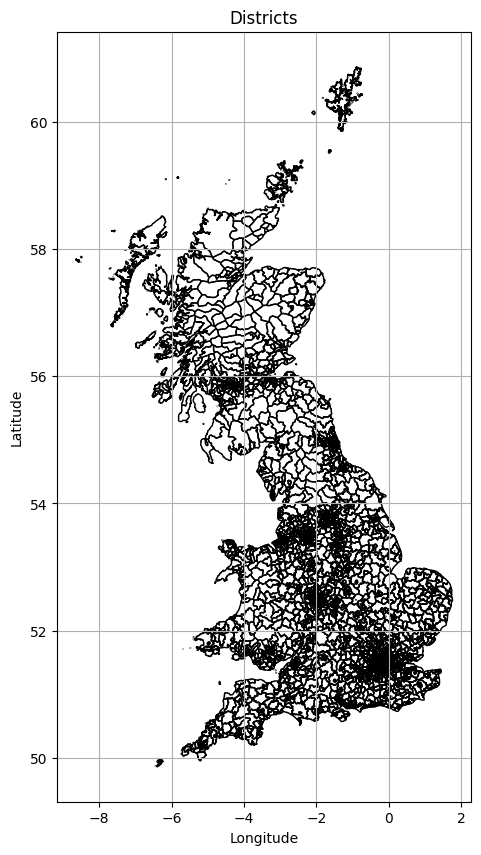

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
uk_subregions.plot(ax=ax, color='none', edgecolor='black')  # Highlight sub-region boundaries
#raw_geodata.plot(ax=ax, column='Accident_Severity', legend=True, cmap='OrRd', markersize=5, alpha=0.6)
plt.title('Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## EDA

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
raw_data.head(3)

Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0  200501BS00001              A           3218.0            NaN   
1  200501BS00002              B            450.0              C   
2  200501BS00003              C              0.0            NaN   

   2nd_Road_Number Accident_Severity Carriageway_Hazards        Date  \
0              0.0           Serious                 NaN  2005-01-04   
1              0.0            Slight                 NaN  2005-01-05   
2              0.0            Slight                 NaN  2005-01-06   

  Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident  ...  \
0     Tuesday                                          1.0  ...   
1   Wednesday                                          1.0  ...   
2    Thursday                                          1.0  ...   

  Road_Surface_Conditions           Road_Type  Special_Conditions_at_Site  \
0             Wet or damp  Single carriageway                         NaN   
1                     Dry    Dual carriageway                         NaN   
2                     Dry  Single carriageway                         NaN   

  Speed_limit   Time Urban_or_Rural_Area     Weather_Conditions  Year  \
0        30.0  17:42               Urban  Raining no high winds  2005   
1        30.0  17:36               Urban     Fine no high winds  2005   
2        30.0  00:15               Urban     Fine no high winds  2005   

   InScotland                     geometry  
0          No   POINT (-0.19117 51.489096)  
1          No  POINT (-0.211708 51.520075)  
2          No  POINT (-0.206458 51.525301)  

[3 rows x 35 columns]

In [28]:
raw_data.shape

(2047081, 35)

In [29]:
# check for 'NaN' values
raw_data.isnull().sum()

Accident_Index                                       0
1st_Road_Class                                       0
1st_Road_Number                                      2
2nd_Road_Class                                  844165
2nd_Road_Number                                  17590
Accident_Severity                                    0
Carriageway_Hazards                            2007642
Date                                                 0
Day_of_Week                                          0
Did_Police_Officer_Attend_Scene_of_Accident        278
Junction_Control                                     0
Junction_Detail                                      0
Latitude                                             0
Light_Conditions                                     0
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
Location_Easting_OSGR                                0
Location_Northing_OSGR                               0
Longitude 

In [30]:
# Removing columns that are not used
raw_data = raw_data.drop(columns=['1st_Road_Class', '1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number', 
                                  'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident',
                                    'Junction_Control', 'Local_Authority_(Highway)', 'Location_Easting_OSGR',
                                    'Location_Northing_OSGR', 'LSOA_of_Accident_Location', 'Pedestrian_Crossing-Human_Control',
                                    'Pedestrian_Crossing-Physical_Facilities', 'Police_Force', 'Special_Conditions_at_Site',
                                     'InScotland'])

In [31]:
raw_data.isnull().sum()

Accident_Index                  0
Accident_Severity               0
Date                            0
Day_of_Week                     0
Junction_Detail                 0
Latitude                        0
Light_Conditions                0
Local_Authority_(District)      0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Speed_limit                    37
Time                          156
Urban_or_Rural_Area             0
Weather_Conditions              0
Year                            0
geometry                        0
dtype: int64

In [32]:
raw_data['Time'].fillna('N/A', inplace = True)
raw_data['Speed_limit'].fillna('N/A', inplace = True)

C:\Users\1998a\AppData\Local\Temp\ipykernel_31300\1032550391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['Time'].fillna('N/A', inplace = True)
C:\Users\1998a\AppData\Local\Temp\ipykernel_31300\1032550391.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [33]:
## making a copy of raw data
raw_data_copy = raw_data.copy()

In [34]:
raw_data.to_csv('../data/preprocessed_data/processed_data.csv', index=False)

In [35]:
raw_data

Accident_Index Accident_Severity        Date Day_of_Week  \
0        200501BS00001           Serious  2005-01-04     Tuesday   
1        200501BS00002            Slight  2005-01-05   Wednesday   
2        200501BS00003            Slight  2005-01-06    Thursday   
3        200501BS00004            Slight  2005-01-07      Friday   
4        200501BS00005            Slight  2005-01-10      Monday   
...                ...               ...         ...         ...   
2047251  2017984121017            Slight  2017-12-17      Sunday   
2047252  2017984121217            Slight  2017-12-15      Friday   
2047253  2017984121717            Slight  2017-12-18      Monday   
2047254  2017984122317            Slight  2017-07-18     Tuesday   
2047255  2017984122617           Serious  2017-12-20   Wednesday   

                             Junction_Detail   Latitude  \
0        Not at junction or within 20 metres  51.489096   
1                                 Crossroads  51.520075   
2        Not at junction or within 20 metres  51.525301   
3        Not at junction or within 20 metres  51.482442   
4        Not at junction or within 20 metres  51.495752   
...                                      ...        ...   
2047251  Not at junction or within 20 metres  55.311793   
2047252  Not at junction or within 20 metres  54.994285   
2047253                            Slip road  55.053767   
2047254  Not at junction or within 20 metres  55.326392   
2047255              T or staggered junction  54.989905   

                    Light_Conditions Local_Authority_(District)  Longitude  \
0                           Daylight     Kensington and Chelsea  -0.191170   
1              Darkness - lights lit     Kensington and Chelsea  -0.211708   
2              Darkness - lights lit     Kensington and Chelsea  -0.206458   
3                           Daylight     Kensington and Chelsea  -0.173862   
4        Darkness - lighting unknown     Kensington and Chelsea  -0.156618   
...                              ...                        ...        ...   
2047251                     Daylight      Dumfries and Galloway  -3.450645   
2047252                     Daylight      Dumfries and Galloway  -3.067116   
2047253                     Daylight      Dumfries and Galloway  -3.225506   
2047254                     Daylight      Dumfries and Galloway  -3.412672   
2047255                     Daylight      Dumfries and Galloway  -3.272073   

         Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  \
0                           1                   1             Wet or damp   
1                           1                   1                     Dry   
2                           1                   2                     Dry   
3                           1                   1                     Dry   
4                           1                   1             Wet or damp   
...                       ...                 ...                     ...   
2047251                     1                   1            Frost or ice   
2047252                     1                   1                     Dry   
2047253                     1                   2             Wet or damp   
2047254                     1                   1                     Dry   
2047255                     2                   2             Wet or damp   

                  Road_Type Speed_limit   Time Urban_or_Rural_Area  \
0        Single carriageway        30.0  17:42               Urban   
1          Dual carriageway        30.0  17:36               Urban   
2        Single carriageway        30.0  00:15               Urban   
3        Single carriageway        30.0  10:35               Urban   
4        Single carriageway        30.0  21:13               Urban   
...                     ...         ...    ...                 ...   
2047251    Dual carriageway        70.0  11:30               Rural   
2047252  Single carriageway        20.0  13:00              

### Explore Data

In [36]:
# Change the index to the column 'Date'
raw_data.index = pd.DatetimeIndex(raw_data['Date'])

C:\Users\1998a\AppData\Local\Temp\ipykernel_31300\2191606900.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data.resample('D').size(), bins=60)


<Axes: title={'center': 'Distribution of accidents per day'}, ylabel='Density'>

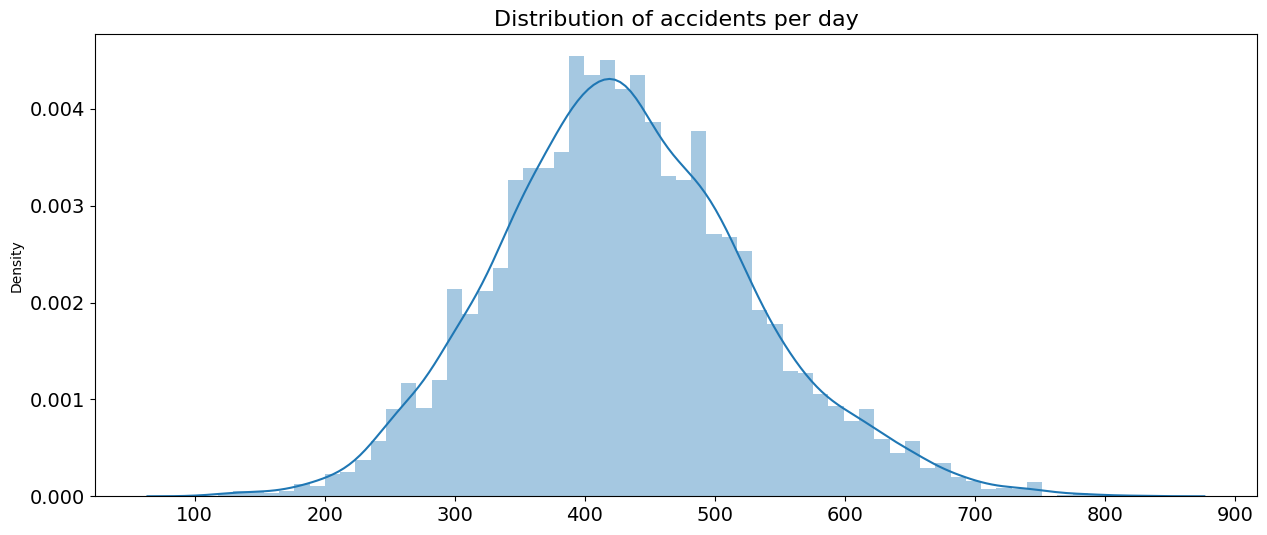

In [37]:
plt.figure(figsize=(15,6))
plt.title('Distribution of accidents per day', fontsize=16)
plt.tick_params(labelsize=14)
sns.distplot(raw_data.resample('D').size(), bins=60)

* As we can see the distribution follows a normal one.

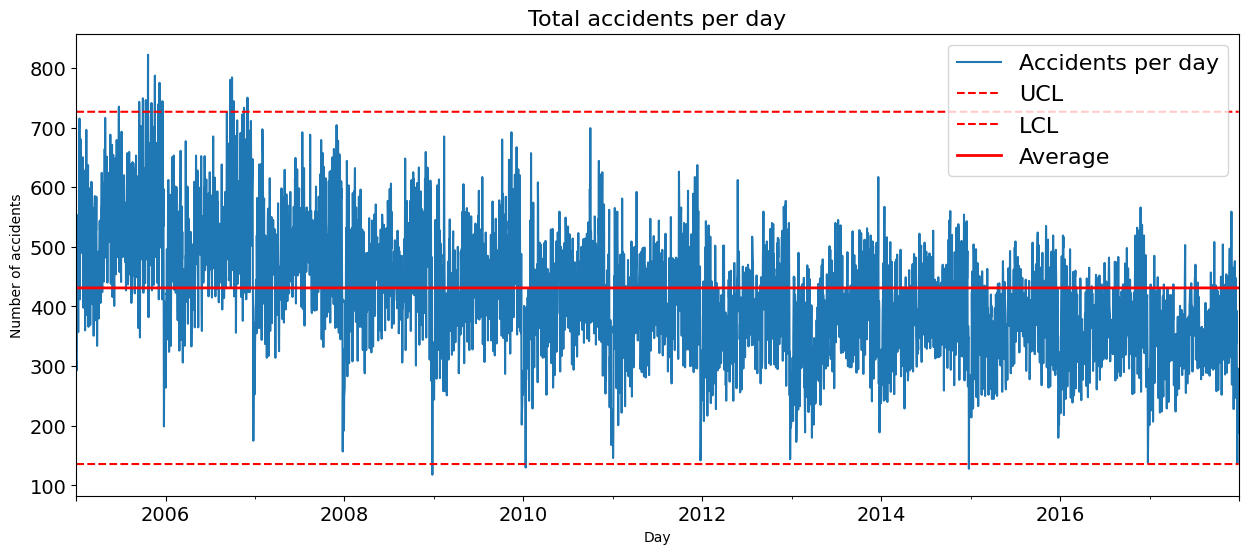

In [38]:
# Create an Upper Control Limit (UCL) and a Lower Control Limit (LCL)
accidents_daily = pd.DataFrame(raw_data.resample('D').size())
accidents_daily['MEAN'] = raw_data.resample('D').size().mean()
accidents_daily['STD'] = raw_data.resample('D').size().std()
UCL = accidents_daily['MEAN'] + 3 * accidents_daily['STD']
LCL = accidents_daily['MEAN'] - 3 * accidents_daily['STD']

# Plot total accidents per day, UCL, LCL and moving-average
plt.figure(figsize=(15,6))
raw_data.resample('D').size().plot(label='Accidents per day')
UCL.plot(color='red', ls='--', linewidth=1.5, label='UCL')
LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
accidents_daily['MEAN'].plot(color='red', linewidth=2, label='Average')
plt.title('Total accidents per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of accidents')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

* Some days are over the control limits.
* The period from 2005 to late 2008 is above the average.
* The period from 2012 till end is below the average.

### Days having the highest number of accidents.

In [39]:
# convert the string 'Date' to date
raw_data['convert_to_date'] = pd.to_datetime(raw_data['Date'])

In [40]:
# add column 'Day', 'Month', 'Year' to the dataframe
raw_data['Day'] = raw_data['convert_to_date'].dt.day
raw_data['Month'] = raw_data['convert_to_date'].dt.month
raw_data['Year'] = raw_data['convert_to_date'].dt.year

<Axes: title={'center': 'Average number of accidents per day and month'}, ylabel='Day'>

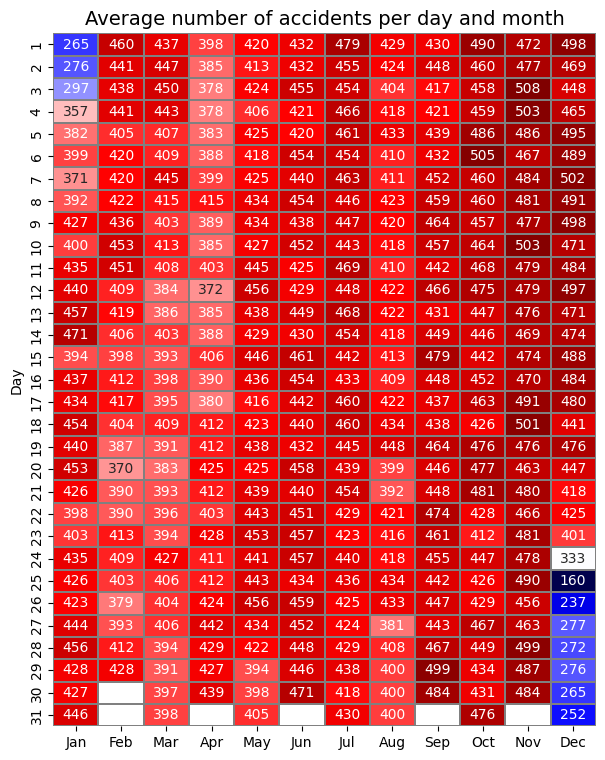

In [41]:
# Create a pivot table by crossing the day number by the month and calculate the average number of accidents for each crossing
accidents_pivot_table = raw_data.pivot_table(values='Date', index='Day', columns='Month', aggfunc=len)
accidents_pivot_table_date_count = raw_data.pivot_table(values='Date', index='Day', columns='Month', aggfunc=lambda x: len(x.unique()))
accidents_average = accidents_pivot_table/accidents_pivot_table_date_count
accidents_average.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Using seaborn heatmap
plt.figure(figsize=(7,9))
plt.title('Average number of accidents per day and month', fontsize=14)
sns.heatmap(accidents_average.round(), cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False, annot=True, fmt=".0f")

* The lowest number of accidents is happening on December 25 (christmas day). Also, we notice that the following days, in christmas' holidays, have low averages.

* A lower number of accidents are occuring in the first half of the year while number of accidents gradually spike in 2nd half of a year.

### Which hours on the day have the highest number of accidents ?

In [42]:
# exclude the rows with 'N/A' values in 'Time' column
accidents_time_not_null = raw_data[raw_data['Time'] != 'N/A']

# convert the string 'Time' to time and extract the hour
accidents_time_not_null['Hour'] = pd.to_datetime(accidents_time_not_null['Time'], format='%H:%M').dt.hour

C:\Users\1998a\AppData\Local\Temp\ipykernel_31300\2446043663.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_time_not_null['Hour'] = pd.to_datetime(accidents_time_not_null['Time'], format='%H:%M').dt.hour


<Axes: title={'center': 'Average number of accidents per hour and day of the week'}, ylabel='Hour'>

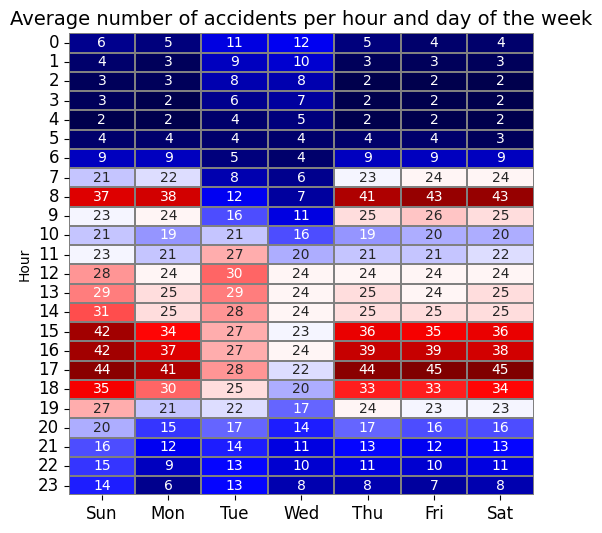

In [43]:
# Create a pivot table by crossing the hour by the day of the week and calculate the average number of accidents for each crossing
accidents_pivot_table = accidents_time_not_null.pivot_table(values='Date', index='Hour', columns='Day_of_Week', aggfunc=len)
accidents_pivot_table_date_count = accidents_time_not_null.pivot_table(values='Date', index='Hour', columns='Day_of_Week', aggfunc=lambda x: len(x.unique()))
accidents_average = accidents_pivot_table/accidents_pivot_table_date_count
accidents_average.columns = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

# Using seaborn heatmap
plt.figure(figsize=(6,6))
plt.title('Average number of accidents per hour and day of the week', fontsize=14)
plt.tick_params(labelsize=12)
sns.heatmap(accidents_average.round(), cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False, annot=True, fmt=".0f")

### Is the number of accidents increasing or decreasing ?

C:\Users\1998a\AppData\Local\Temp\ipykernel_31300\1763811752.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  raw_data.resample('M').size().plot(label='Total per month')
C:\Users\1998a\AppData\Local\Temp\ipykernel_31300\1763811752.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  raw_data.resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=5, label='12-months Moving Average')


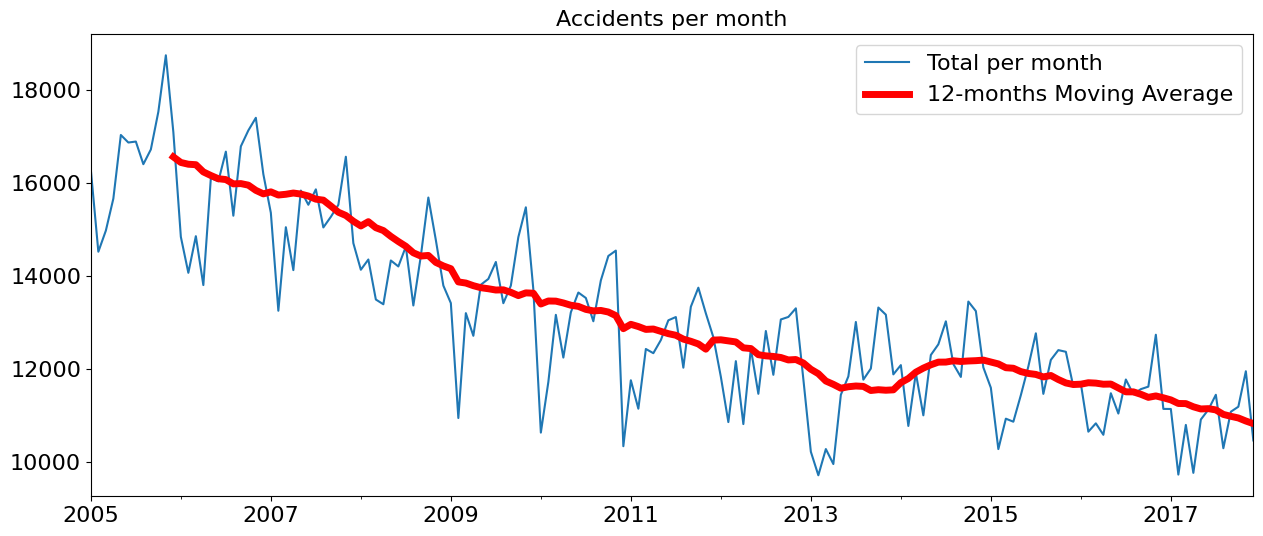

In [44]:
# Using resample 'M' and rolling window 12
plt.figure(figsize=(15,6))
raw_data.resample('M').size().plot(label='Total per month')
raw_data.resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=5, label='12-months Moving Average')

plt.title('Accidents per month', fontsize=16)
plt.xlabel('')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16)

### What about accident categories ?

In [45]:
raw_data['Accident_Severity'].value_counts()

Accident_Severity
Slight     1734402
Serious     286310
Fatal        26369
Name: count, dtype: int64

In [46]:
# Create a function to categorize accident severity
def category(accident_severity):
    if accident_severity == 'Fatal':
        return 1
    elif accident_severity == 'Serious':
        return 2
    elif accident_severity == 'Slight':
        return 3
    else:
        return 0

In [47]:
# Apply the function and add it as 'Accident_Category' column
raw_data['Accident_Category'] = raw_data['Accident_Severity'].apply(category)

In [48]:
raw_data['Accident_Category'].value_counts()

Accident_Category
3    1734402
2     286310
1      26369
Name: count, dtype: int64

C:\Users\1998a\AppData\Local\Temp\ipykernel_31300\3985789155.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  raw_data.pivot_table(values='Accident_Category', index='convert_to_date', columns='Accident_Severity', aggfunc=len).resample('M').sum().rolling(window=12).mean().plot(figsize=(15,6), linewidth=4)


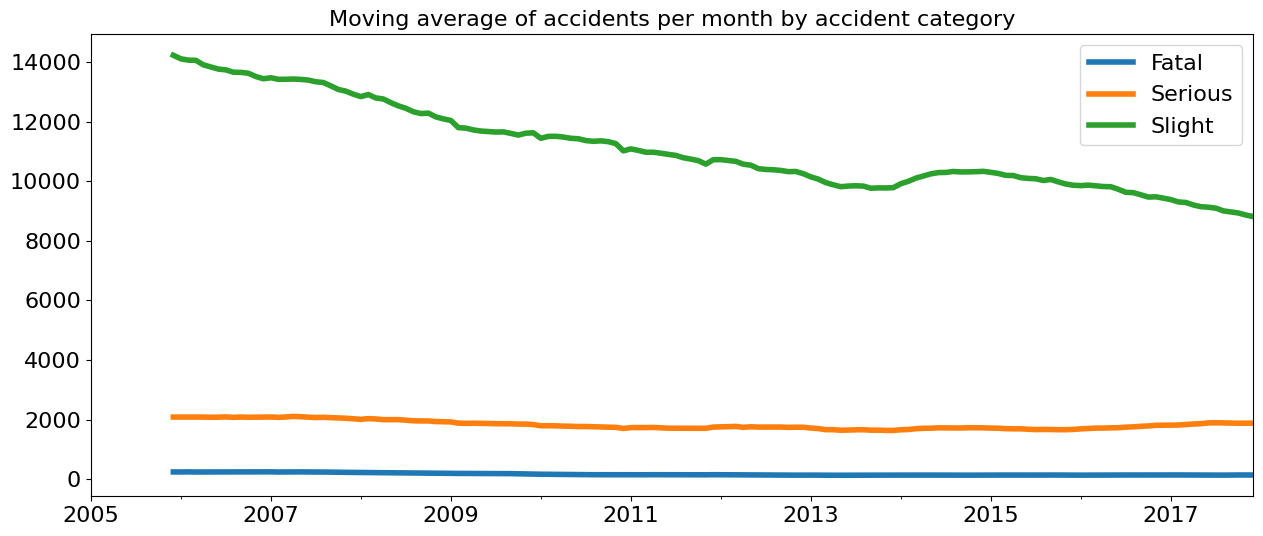

In [49]:
# Using pivot_table to groub by date and category, resample 'M' and rolling window 12
raw_data.pivot_table(values='Accident_Category', index='convert_to_date', columns='Accident_Severity', aggfunc=len).resample('M').sum().rolling(window=12).mean().plot(figsize=(15,6), linewidth=4)
plt.title('Moving average of accidents per month by accident category', fontsize=16)
plt.xlabel('')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16)

### Is there any trend for accident categories within a year ?

<Axes: title={'center': 'Heatmap of accident_severity by month'}, ylabel='Month'>

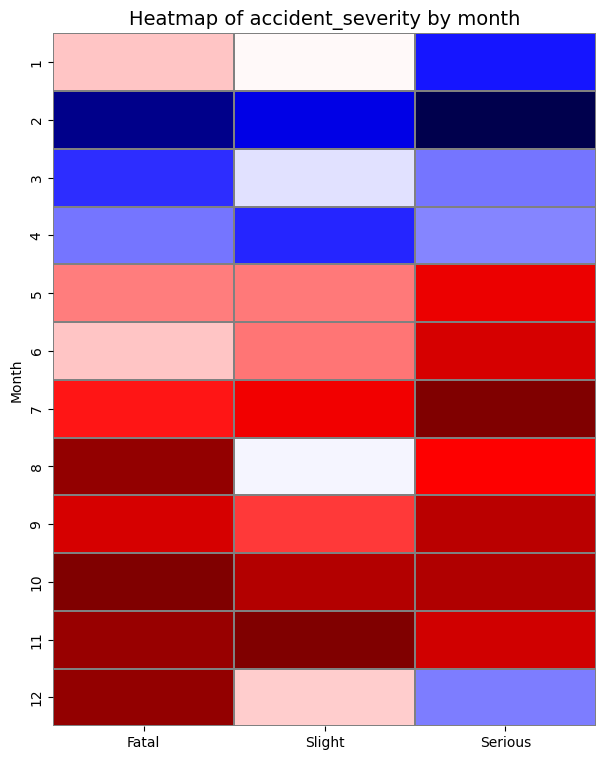

In [50]:
# Create a pivot table
accidents_pivot_table = raw_data.pivot_table(values='Accident_Category', index='Accident_Severity', columns='Month', aggfunc=len)

# Scale each category by diving by the max value of each one
accidents_scaled = pd.DataFrame(accidents_pivot_table.iloc[0] / accidents_pivot_table.iloc[0].max())
for i in [2,1]:
    accidents_scaled[accidents_pivot_table.index[i]] =  pd.DataFrame(accidents_pivot_table.iloc[i] / accidents_pivot_table.iloc[i].max())

# Using seaborn heatmap
plt.figure(figsize=(7,9))
plt.title('Heatmap of accident_severity by month', fontsize=14)
sns.heatmap(accidents_scaled, cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False)

* The three categories of accidents are least likely to occur in February.

### What about the day of the week ?

<Axes: title={'center': 'Heatmap of accident_severity by day of week'}>

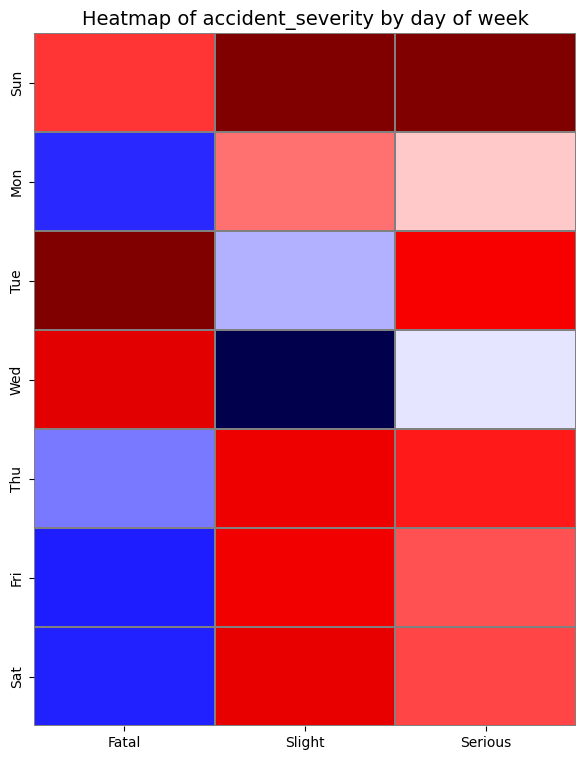

In [51]:
# Create a pivot table
accidents_pivot_table = raw_data.pivot_table(values='Accident_Category', index='Accident_Severity', columns='Day_of_Week', aggfunc=len)

# Scale each category by diving by the max value of each one
accidents_scaled = pd.DataFrame(accidents_pivot_table.iloc[0] / accidents_pivot_table.iloc[0].max())
for i in [2,1]:
    accidents_scaled[accidents_pivot_table.index[i]] =  pd.DataFrame(accidents_pivot_table.iloc[i] / accidents_pivot_table.iloc[i].max())

accidents_scaled.index = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

# Using seaborn heatmap
plt.figure(figsize=(7,9))
plt.title('Heatmap of accident_severity by day of week', fontsize=14)
sns.heatmap(accidents_scaled, cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False)

## Kaggle example

In [52]:
import shapefile

In [53]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, shape
from sklearn.utils import shuffle
import matplotlib.cm
from matplotlib.colors import Normalize
import numpy as np

In [54]:
cleaned_data = pd.read_csv('../data/preprocessed_data/processed_data.csv')

C:\Users\1998a\AppData\Local\Temp\ipykernel_31300\2497408956.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data = pd.read_csv('../data/preprocessed_data/processed_data.csv')


In [55]:
# Shuffle the data
cleaned_data = shuffle(cleaned_data)

In [57]:
# Read the shapefile using Geopandas for better integration with Geopandas data structures
gdf = gpd.read_file('../data/Distribution/Districts.shp')
gdf

name                                           geometry
0     AB10  POLYGON ((-2.11645 57.14656, -2.11655 57.14663...
1     AB11  MULTIPOLYGON (((-2.05257 57.13426, -2.05729 57...
2     AB12  MULTIPOLYGON (((-2.12807 57.03684, -2.12986 57...
3     AB13  POLYGON ((-2.26153 57.10694, -2.27015 57.11525...
4     AB14  POLYGON ((-2.26153 57.10694, -2.26315 57.10619...
...    ...                                                ...
2875  YO90  MULTIPOLYGON (((-1.08958 53.95931, -1.08891 53...
2876  YO91  POLYGON ((-1.0653 53.97796, -1.06634 53.9783, ...
2877   ZE1  MULTIPOLYGON (((-1.17282 60.12108, -1.18797 60...
2878   ZE2  MULTIPOLYGON (((-0.8021 60.40932, -0.80233 60....
2879   ZE3  MULTIPOLYGON (((-1.3806 59.88701, -1.37423 59....

[2880 rows x 2 columns]

In [58]:
# Assuming the shapefile has a 'name' column for area names
# Convert longitude and latitude columns to a GeoDataFrame of points
geometry = [Point(xy) for xy in zip(cleaned_data['Longitude'], cleaned_data['Latitude'])]
points_gdf = gpd.GeoDataFrame(cleaned_data, geometry=geometry)

In [59]:
# Ensure the points and gdf have the same CRS
points_gdf.set_crs(gdf.crs, inplace=True)

Accident_Index Accident_Severity        Date Day_of_Week  \
1401913  2013130291626            Slight  2013-07-15      Monday   
502579   200742I191805            Slight  2007-05-14      Monday   
564124   200797AB01407            Slight  2007-07-05    Thursday   
910155   201001JC30107           Serious  2010-03-05      Friday   
1044138  2010620198149            Slight  2010-02-04    Thursday   
...                ...               ...         ...         ...   
44296    200506K923403           Serious  2005-03-25      Friday   
583209   200801QA10382            Slight  2008-11-05   Wednesday   
217052   200601TX20245            Slight  2006-04-19   Wednesday   
1040421  2010550C47652            Slight  2010-10-29      Friday   
567890   200797NE04503            Slight  2007-03-21   Wednesday   

                             Junction_Detail   Latitude  \
1401913              T or staggered junction  53.660715   
502579                            Crossroads  51.558386   
564124                            Crossroads  55.858635   
910155               T or staggered junction  51.604618   
1044138                           Crossroads  51.436472   
...                                      ...        ...   
44296    Not at junction or within 20 metres  53.562170   
583209   Not at junction or within 20 metres  51.579985   
217052               T or staggered junction  51.473562   
1040421                           Crossroads  50.725034   
567890                            Crossroads  55.788385   

              Light_Conditions Local_Authority_(District)  Longitude  \
1401913               Daylight                  Wakefield  -1.559694   
502579                Daylight            Southend-on-Sea   0.696124   
564124                Daylight               Glasgow City  -4.258957   
910155                Daylight             Waltham Forest  -0.016607   
1044138  Darkness - lights lit      The Vale of Glamorgan  -3.174065   
...                        ...                        ...        ...   
44296    Darkness - lights lit                     Bolton  -2.453195   
583209   Darkness - lights lit                     Harrow  -0.335215   
217052                Daylight                   Hounslow  -0.377107   
1040421               Daylight                      Poole  -1.977442   
567890                Daylight          North Lanarkshire  -3.997443   

         Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  \
1401913                     1                   1                     Dry   
502579                      1                   2             Wet or damp   
564124                      1                   1                     Dry   
910155                      1                   1                     Dry   
1044138                     1                   2                     Dry   
...                       ...                 ...                     ...   
44296                       1                   1                     Dry   
583209                      1                   1             Wet or damp   
217052                      1                   2                     Dry   
1040421                     1                   2             Wet or damp   
567890                      1                   3                     Dry   

                  Road_Type  Speed_limit   Time Urban_or_Rural_Area  \
1401913  Single carriageway         30.0  09:30               Urban   
502579     Dual carriageway         40.0  08:50               Urban   
564124   Single carriageway         30.0  17:00               Urban   
910155   Single carriageway         30.0  08:40               Urban   
1044138  Single carriageway         30.0  19:40               Urban   
...                     ...          ...    ...                 ...   
44296    Single carriageway         30.0  00:15               Urban   
583209   Single carriageway         30.0  19:20               Urban   
217052   Single carriageway         30.0  09:12      

In [60]:
# Perform spatial join to map accidents to areas
acc_with_areas = gpd.sjoin(points_gdf, gdf[['geometry', 'name']], how='left', predicate='within')

In [61]:
# Add the 'Area' column to the accidents data
cleaned_data['Area'] = acc_with_areas['name']

In [62]:
# Create a new DataFrame by grouping by 'Area' and counting the number of accidents
acc_by_area = cleaned_data.groupby('Area').size().reset_index(name='Total_accidents')

In [63]:
# Merge the total accidents back into the GeoDataFrame
gdf = gdf.merge(acc_by_area, left_on='name', right_on='Area', how='left')

In [64]:
# Replace NaN values with 0 in 'Total_accidents' if any
gdf['Total_accidents'].fillna(0, inplace=True)

C:\Users\1998a\AppData\Local\Temp\ipykernel_31300\3768974702.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf['Total_accidents'].fillna(0, inplace=True)


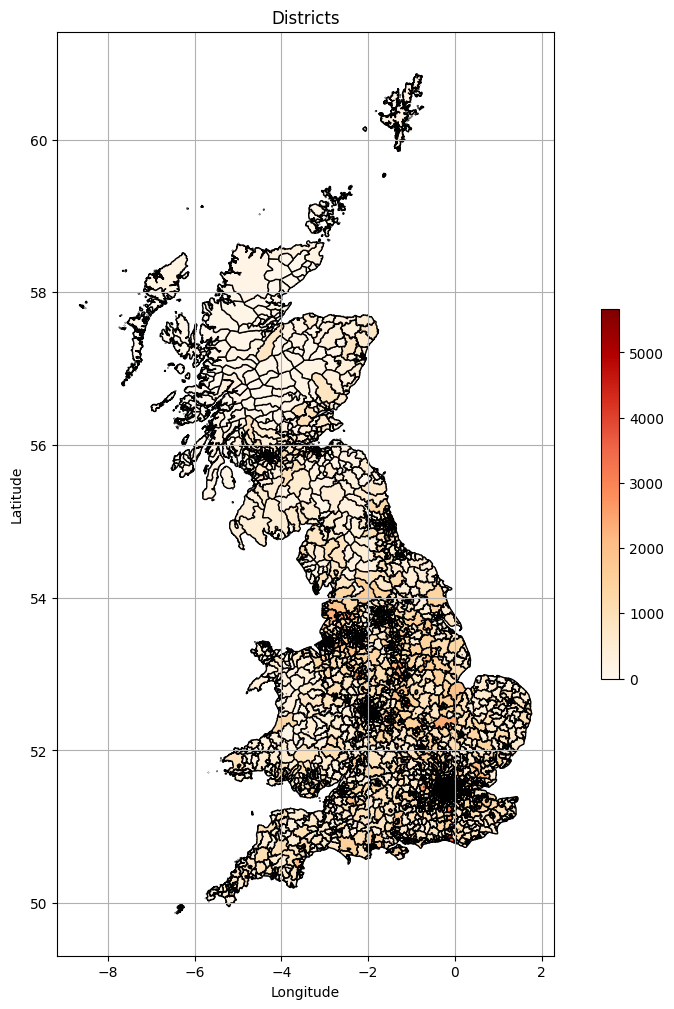

In [65]:
# Plot the Choropleth map
'''vmin, vmax = gdf['Total_accidents'].min(), gdf['Total_accidents'].max()
ax = gdf.plot(column='Total_accidents', cmap='OrRd', edgecolor='black', figsize=(12, 12), linewidth=1)
fig = ax.get_figure()
sm = matplotlib.cm.ScalarMappable(cmap='OrRd', norm=Normalize(vmin=vmin, vmax=vmax))
sm.set_array(gdf['Total_accidents'])
fig.colorbar(sm, shrink=0.4)
plt.show()'''

# Plot the Choropleth map
vmin, vmax = gdf['Total_accidents'].min(), gdf['Total_accidents'].max()
fig, ax = plt.subplots(figsize=(12, 12))  # Create a new figure and axes
gdf.plot(column='Total_accidents', cmap='OrRd', edgecolor='black', linewidth=1, ax=ax)
sm = matplotlib.cm.ScalarMappable(cmap='OrRd', norm=Normalize(vmin=vmin, vmax=vmax))
sm.set_array(gdf['Total_accidents'])
fig.colorbar(sm, ax=ax, shrink=0.4)  # Specify the axes for the colorbar
plt.title('Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

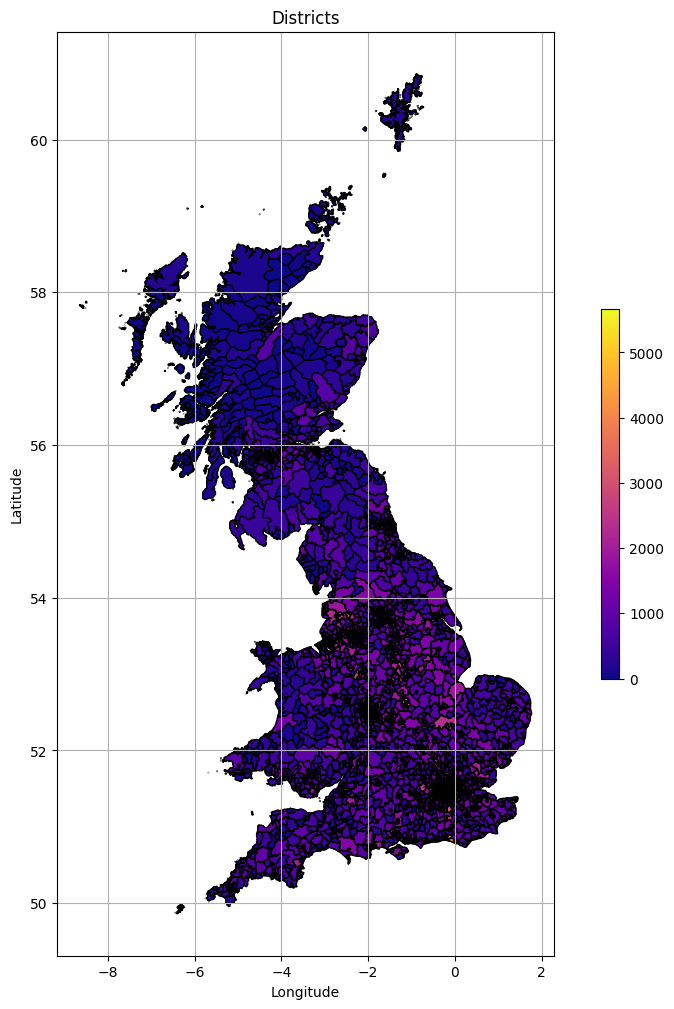

In [66]:
# Define the colormap and normalization
colormap = plt.cm.plasma  # Purple to yellow range
vmin, vmax = gdf['Total_accidents'].min(), gdf['Total_accidents'].max()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the Choropleth map with the specified colormap
gdf.plot(column='Total_accidents', cmap=colormap, edgecolor='black', linewidth=1, ax=ax)

# Create the colorbar with the same colormap
sm = matplotlib.cm.ScalarMappable(cmap=colormap, norm=Normalize(vmin=vmin, vmax=vmax))
sm.set_array(gdf['Total_accidents'])
fig.colorbar(sm, ax=ax, shrink=0.4)
plt.title('Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


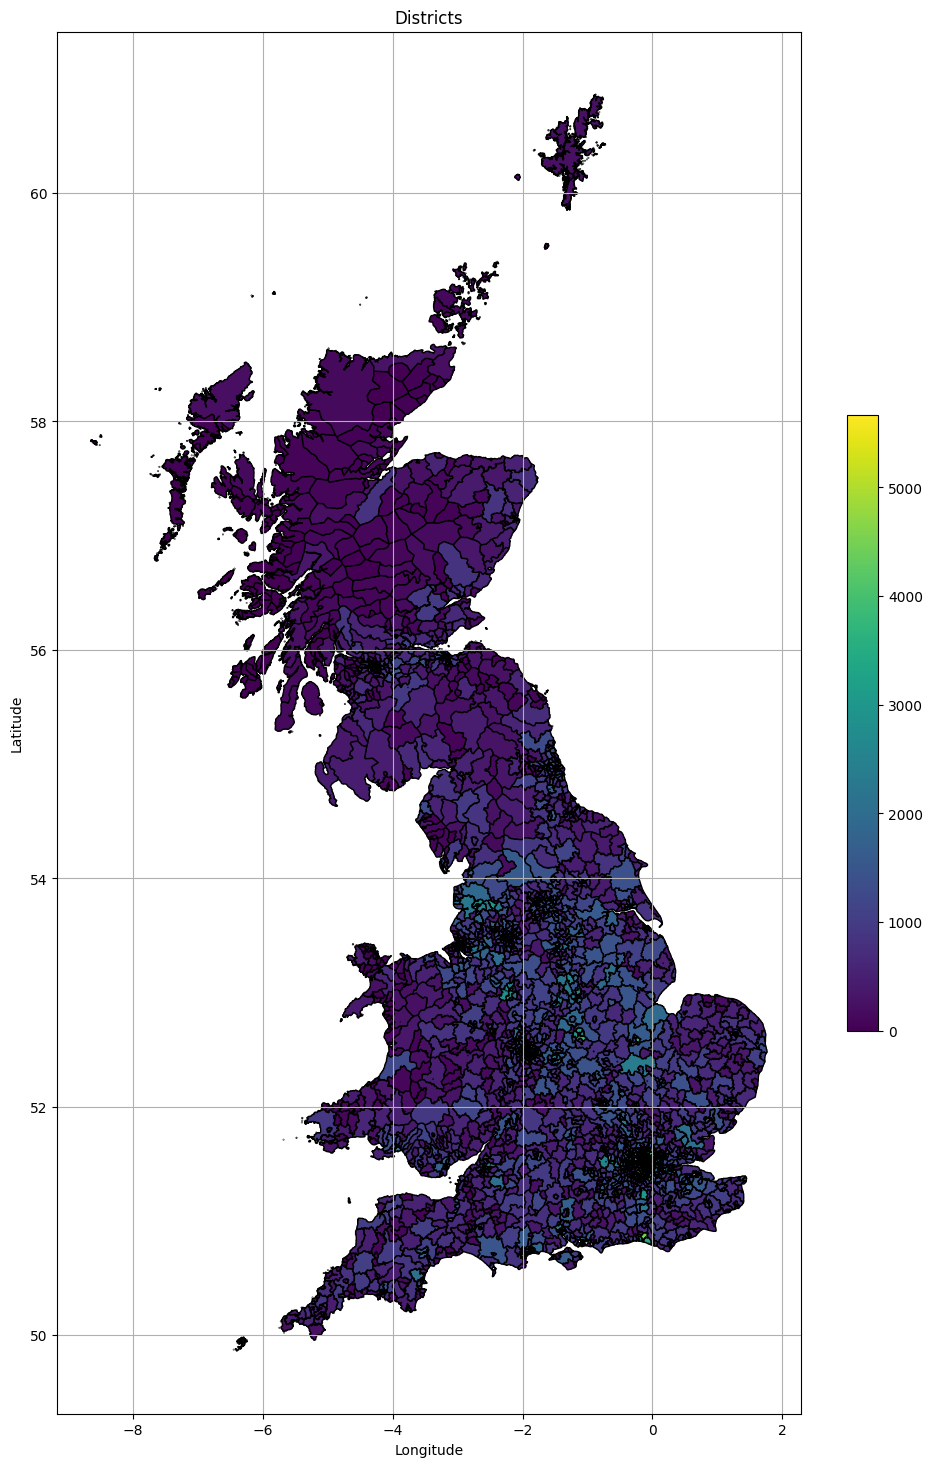

In [67]:
# Choose a colormap, e.g., 'viridis', 'magma', 'inferno', 'cividis'
cmap = plt.cm.viridis

fig, ax = plt.subplots(figsize=(12, 20))
gdf.plot(column='Total_accidents', cmap=cmap, edgecolor='black', linewidth=1, ax=ax)

sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=vmin, vmax=vmax))
sm.set_array(gdf['Total_accidents'])
fig.colorbar(sm, ax=ax, shrink=0.4)
plt.title('Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


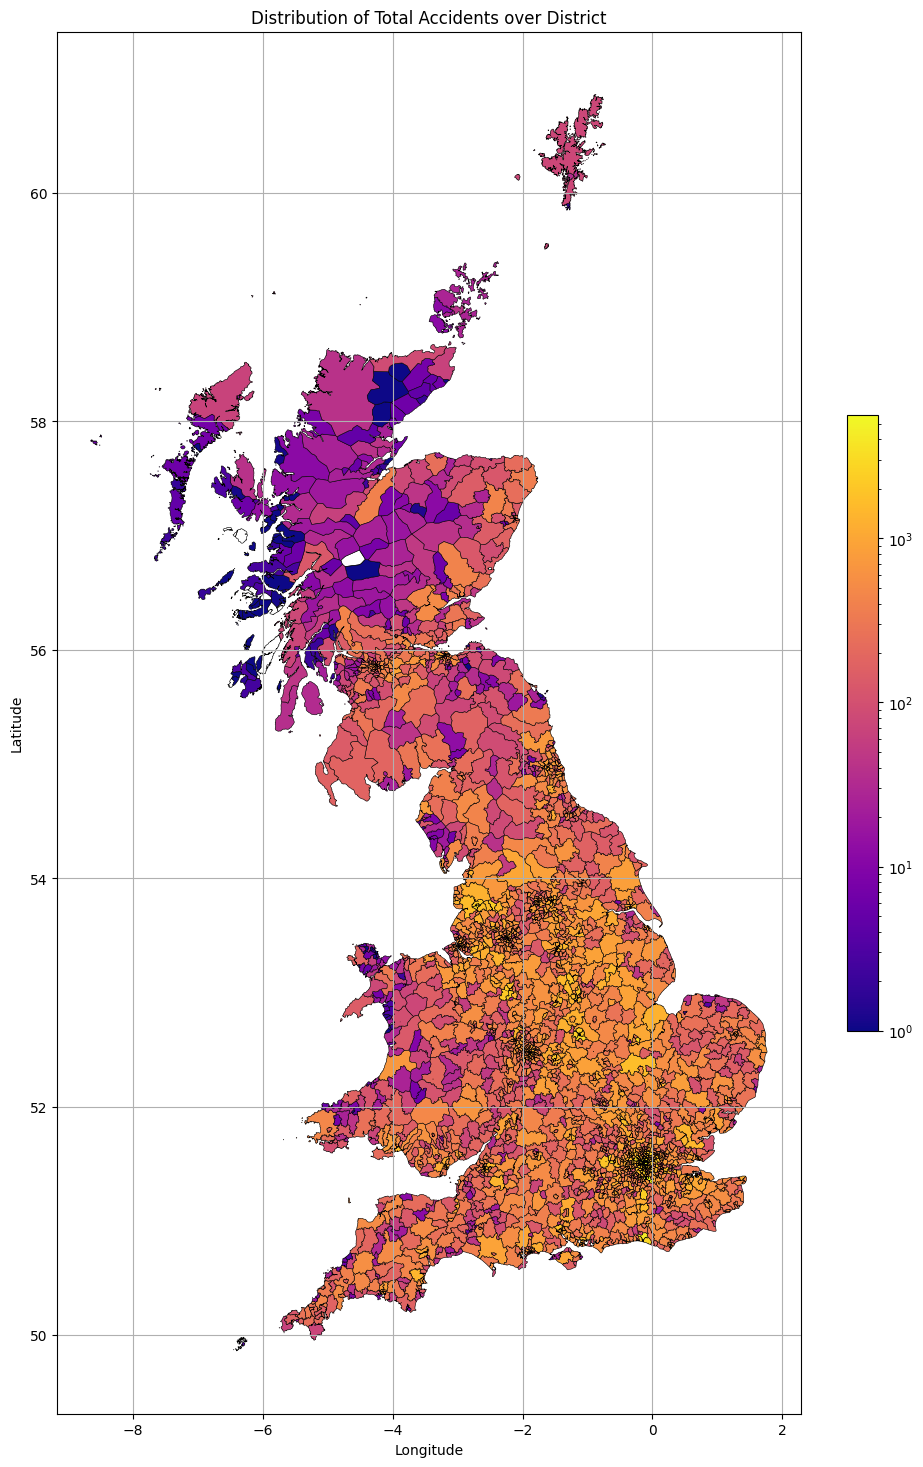

In [68]:
from matplotlib.colors import LogNorm
colormap = plt.cm.plasma
# Apply LogNorm to the colormap normalization
fig, ax = plt.subplots(figsize=(12, 20))
gdf.plot(column='Total_accidents', cmap=colormap, edgecolor='black', linewidth=0.4, ax=ax, norm=LogNorm(vmin=10, vmax=vmax))

sm = matplotlib.cm.ScalarMappable(cmap=colormap, norm=LogNorm(vmin=1, vmax=vmax))
sm.set_array(gdf['Total_accidents'])
fig.colorbar(sm, ax=ax, shrink=0.4)
plt.title('Distribution of Total Accidents over District')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Define the filename and path where you want to save the image
#output_filename = '../figure/high_resolution_map.png'
# Save the figure with high resolution
#fig.savefig(output_filename, dpi=300)  # You can adjust dpi as needed, e.g., 300, 600, etc.

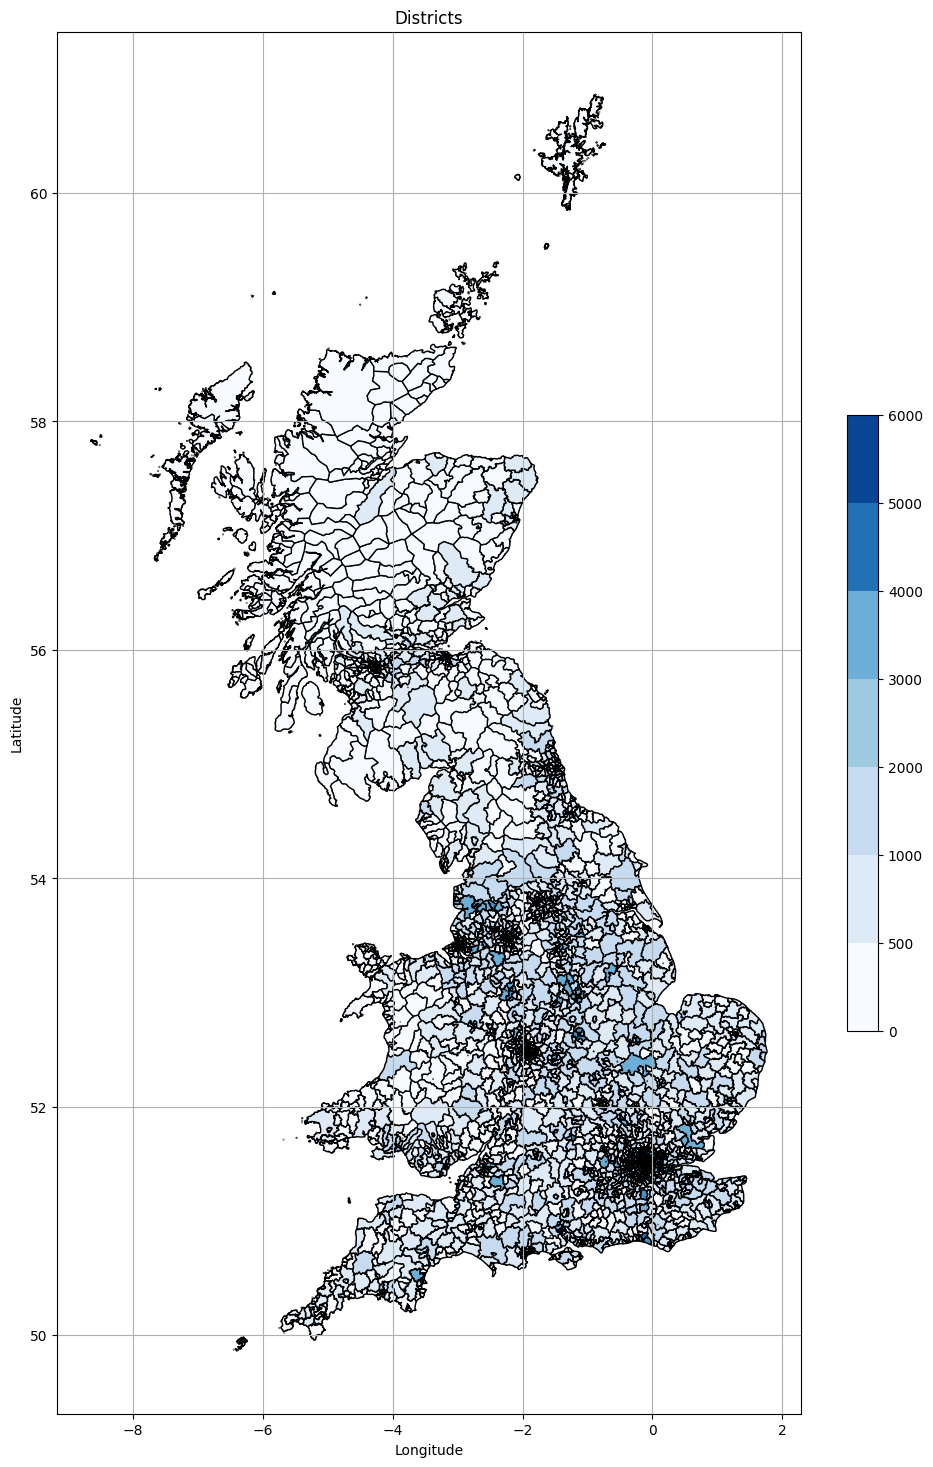

In [69]:
import numpy as np
from matplotlib.colors import ListedColormap

# Define bins and corresponding colors
bins = [0, 500, 1000, 2000, 3000, 4000, 5000, 6000]
colors = ['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#084594']
cmap = ListedColormap(colors)

# Bin the data
gdf['bins'] = np.digitize(gdf['Total_accidents'], bins)

fig, ax = plt.subplots(figsize=(12, 20))
gdf.plot(column='bins', cmap=cmap, edgecolor='black', linewidth=1, ax=ax)

# Create a colorbar using the custom bins and colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(bins), vmax=max(bins)))
sm.set_array([])
fig.colorbar(sm, ax=ax, shrink=0.4, boundaries=bins, ticks=bins)
plt.title('Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


C:\Users\1998a\AppData\Local\Temp\ipykernel_16520\1111833786.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = plt.cm.get_cmap('viridis', num_bins)


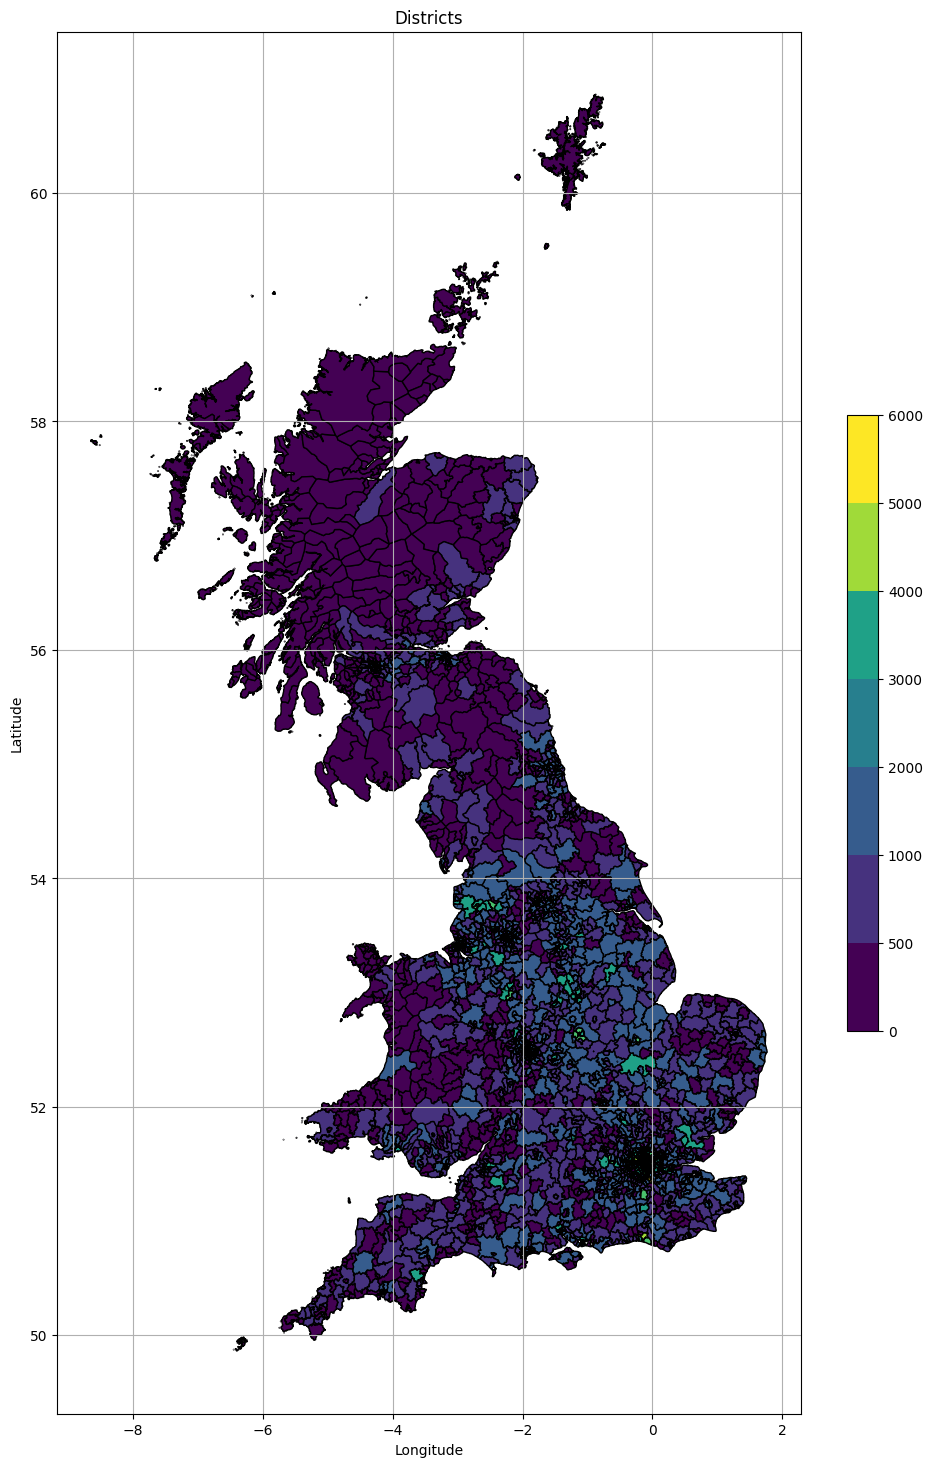

In [159]:
import numpy as np
from matplotlib.colors import ListedColormap, Normalize
import matplotlib.pyplot as plt

# Define the number of bins and corresponding colors from viridis
num_bins = 8
viridis = plt.cm.get_cmap('viridis', num_bins)

# Extract colors from viridis colormap
colors = [viridis(i) for i in range(num_bins)]
cmap = ListedColormap(colors)

# Define your custom bins
bins = [0, 500, 1000, 2000, 3000, 4000, 5000, 6000]

# Bin the data according to these custom bins
gdf['bins'] = np.digitize(gdf['Total_accidents'], bins)

fig, ax = plt.subplots(figsize=(12, 20))
gdf.plot(column='bins', cmap=cmap, edgecolor='black', linewidth=1, ax=ax)

# Create the colorbar, using the custom bins and the colormap created
sm = plt.cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=min(bins), vmax=max(bins)))
sm.set_array([])  # Required for ScalarMappable, even if array is not used
fig.colorbar(sm, ax=ax, shrink=0.4, boundaries=bins, ticks=bins)
plt.title('Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


### Considering percentage


In [70]:
# Calculate the total number of accidents per district
acc_by_area = acc_with_areas.groupby('name').size().reset_index(name='Total_accidents')

# Calculate the percentage of accidents in each district
total_accidents = acc_by_area['Total_accidents'].sum()
acc_by_area['Percentage'] = (acc_by_area['Total_accidents'] / total_accidents) * 100

In [71]:
# Merge the percentage data back into the GeoDataFrame
gdf2 = gdf.merge(acc_by_area[['name', 'Percentage']], left_on='name', right_on='name', how='left')

In [72]:
# Replace NaN values with 0 in 'Percentage' if any
gdf2['Percentage'].fillna(0, inplace=True)

C:\Users\1998a\AppData\Local\Temp\ipykernel_31300\1935423314.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf2['Percentage'].fillna(0, inplace=True)


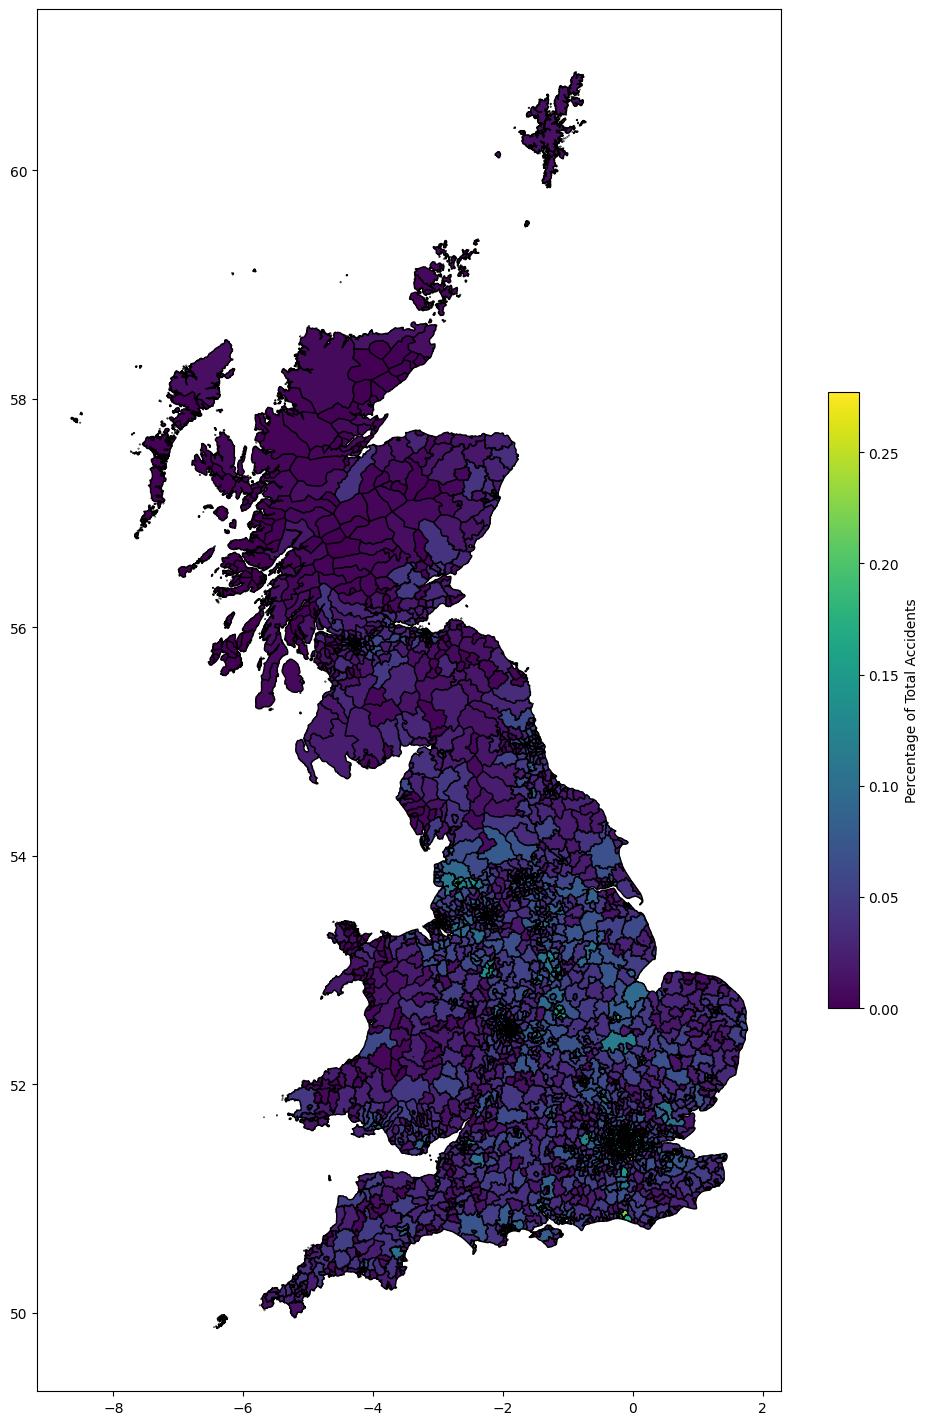

In [73]:
from matplotlib.colors import LinearSegmentedColormap

# Define custom colormap from purple to yellow
#cmap = LinearSegmentedColormap.from_list('purple_yellow', ['purple', 'yellow'])
cmap = plt.cm.viridis
# Plot the Choropleth map with percentage values
fig, ax = plt.subplots(figsize=(12, 20))
gdf2.plot(column='Percentage', cmap=cmap, edgecolor='black', linewidth=1, ax=ax)

# Create a colorbar for the percentage values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=gdf2['Percentage'].min(), vmax=gdf2['Percentage'].max()))
sm.set_array([])
fig.colorbar(sm, ax=ax, shrink=0.4, label='Percentage of Total Accidents')

plt.show()

### Spatial Smoothing

In [74]:
from scipy.spatial import cKDTree
import matplotlib.cm
from matplotlib.colors import Normalize

In [75]:
# Extract the centroids of the areas for spatial smoothing
gdf['centroid'] = gdf.geometry.centroid
centroids = np.array([[point.x, point.y] for point in gdf.centroid])
kdtree = cKDTree(centroids)

C:\Users\1998a\AppData\Local\Temp\ipykernel_31300\3080705062.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid
C:\Users\1998a\AppData\Local\Temp\ipykernel_31300\3080705062.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = np.array([[point.x, point.y] for point in gdf.centroid])


## Smoothing without Weights

In [76]:
# Define the smoothing function
def spatial_smoothing(values, centroids, k=5):
    smoothed_values = np.zeros_like(values)
    for i, centroid in enumerate(centroids):
        distances, indices = kdtree.query(centroid, k=k)
        smoothed_values[i] = np.mean(values[indices])
    return smoothed_values

In [77]:
# Apply spatial smoothing to the Total_accidents
values = gdf['Total_accidents'].values
smoothed_values = spatial_smoothing(values, centroids, k=5)
gdf['Smoothed_accidents'] = smoothed_values

In [78]:
gdf

name                                           geometry  Area  \
0     AB10  POLYGON ((-2.11645 57.14656, -2.11655 57.14663...  AB10   
1     AB11  MULTIPOLYGON (((-2.05257 57.13426, -2.05729 57...  AB11   
2     AB12  MULTIPOLYGON (((-2.12807 57.03684, -2.12986 57...  AB12   
3     AB13  POLYGON ((-2.26153 57.10694, -2.27015 57.11525...  AB13   
4     AB14  POLYGON ((-2.26153 57.10694, -2.26315 57.10619...  AB14   
...    ...                                                ...   ...   
2875  YO90  MULTIPOLYGON (((-1.08958 53.95931, -1.08891 53...  YO90   
2876  YO91  POLYGON ((-1.0653 53.97796, -1.06634 53.9783, ...   NaN   
2877   ZE1  MULTIPOLYGON (((-1.17282 60.12108, -1.18797 60...   ZE1   
2878   ZE2  MULTIPOLYGON (((-0.8021 60.40932, -0.80233 60....   ZE2   
2879   ZE3  MULTIPOLYGON (((-1.3806 59.88701, -1.37423 59....   ZE3   

      Total_accidents  bins                   centroid  Smoothed_accidents  
0               545.0     2  POINT (-2.12625 57.13012)               436.2  
1               586.0     2   POINT (-2.0814 57.13884)               436.2  
2               625.0     2  POINT (-2.16191 57.08609)               424.8  
3                23.0     1  POINT (-2.24511 57.11145)               329.2  
4                46.0     1  POINT (-2.29575 57.10751)               272.8  
...               ...   ...                        ...                 ...  
2875             11.0     1   POINT (-1.08787 53.9591)               426.6  
2876              0.0     1  POINT (-1.06575 53.97826)               401.2  
2877            137.0     1  POINT (-1.22825 60.15188)               131.2  
2878            243.0     1  POINT (-1.25351 60.38858)               131.2  
2879             16.0     1  POINT (-1.29831 59.88171)               131.2  

[2880 rows x 7 columns]

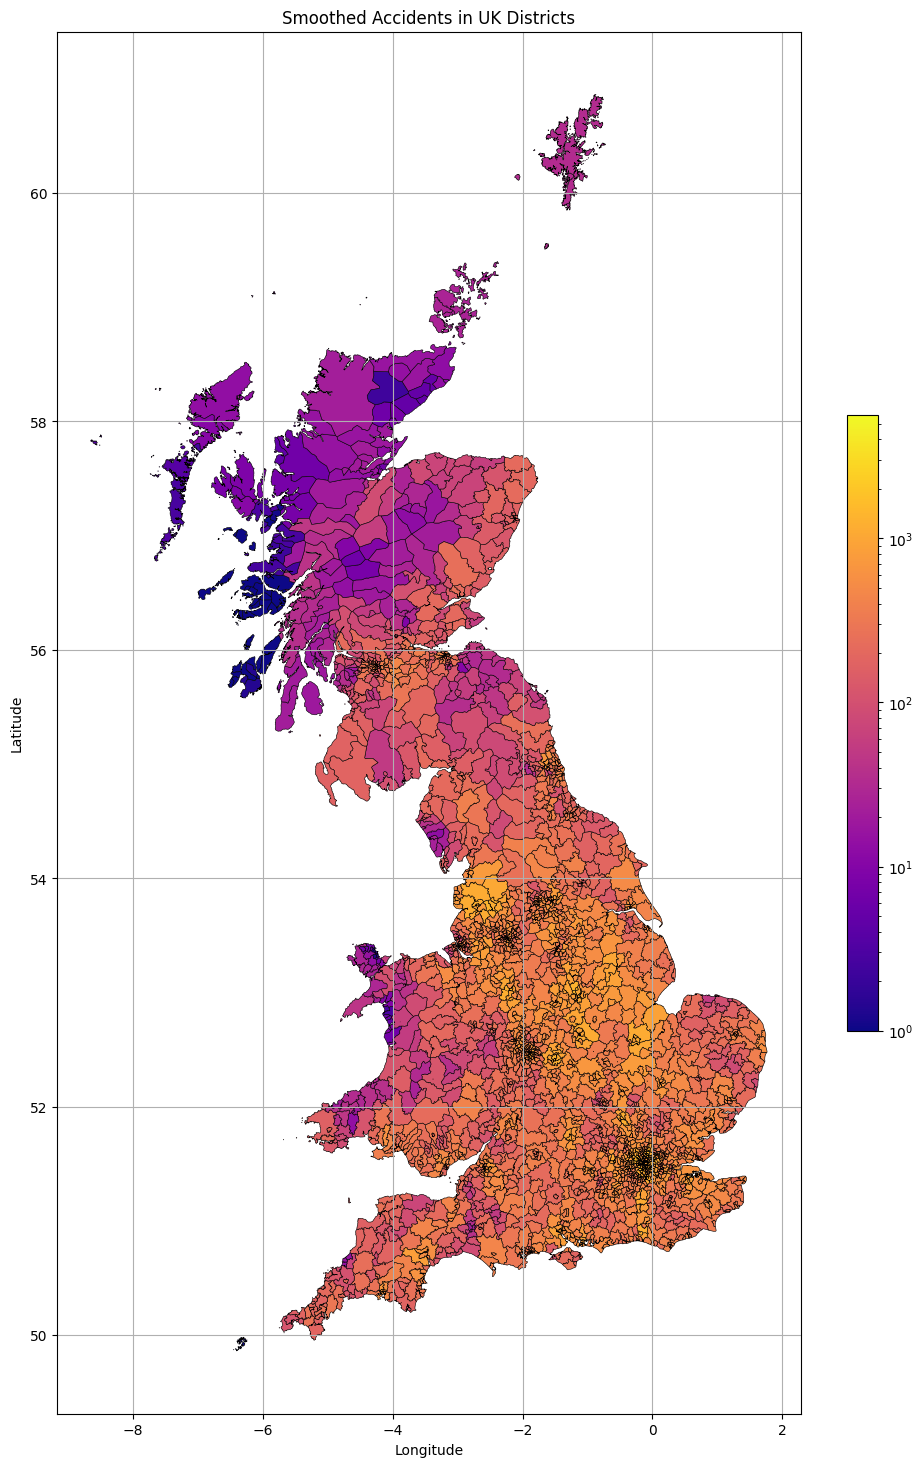

In [79]:
# Plot the smoothed data
'''vmin, vmax = gdf['Smoothed_accidents'].min(), gdf['Smoothed_accidents'].max()
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf.plot(column='Smoothed_accidents', cmap='viridis_r', linewidth=0.8, ax=ax, edgecolor='0.8')
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(vmin=vmin, vmax=vmax), cmap='viridis_r'), ax=ax, shrink=0.4)
plt.title('Smoothed Total Accidents in UK Districts')
plt.show()'''


from matplotlib.colors import LogNorm
colormap = plt.cm.plasma
# Apply LogNorm to the colormap normalization
fig, ax = plt.subplots(figsize=(12, 20))
gdf.plot(column='Smoothed_accidents', cmap=colormap, edgecolor='black', linewidth=0.4, ax=ax, norm=LogNorm(vmin=10, vmax=vmax))

sm = matplotlib.cm.ScalarMappable(cmap=colormap, norm=LogNorm(vmin=1, vmax=vmax))
sm.set_array(gdf['Smoothed_accidents'])
fig.colorbar(sm, ax=ax, shrink=0.4)
plt.title('Smoothed Accidents in UK Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

### Spatial smoothing with weights

In [80]:
# Define the smoothing function with Gaussian weights
def spatial_smoothing_gaussian(values, centroids, k=10, bandwidth=0.1):
    smoothed_values2 = np.zeros_like(values)
    for i, centroid in enumerate(centroids):
        distances, indices = kdtree.query(centroid, k=k)
        weights = np.exp(-distances**2 / (2 * bandwidth**2))
        smoothed_values2[i] = np.sum(values[indices] * weights) / np.sum(weights)
    return smoothed_values2

In [81]:
# Apply spatial smoothing to the Total_accidents
values = gdf['Total_accidents'].values
smoothed_values2 = spatial_smoothing_gaussian(values, centroids, k=10, bandwidth=1)
gdf['Smoothed_accidents2'] = smoothed_values2

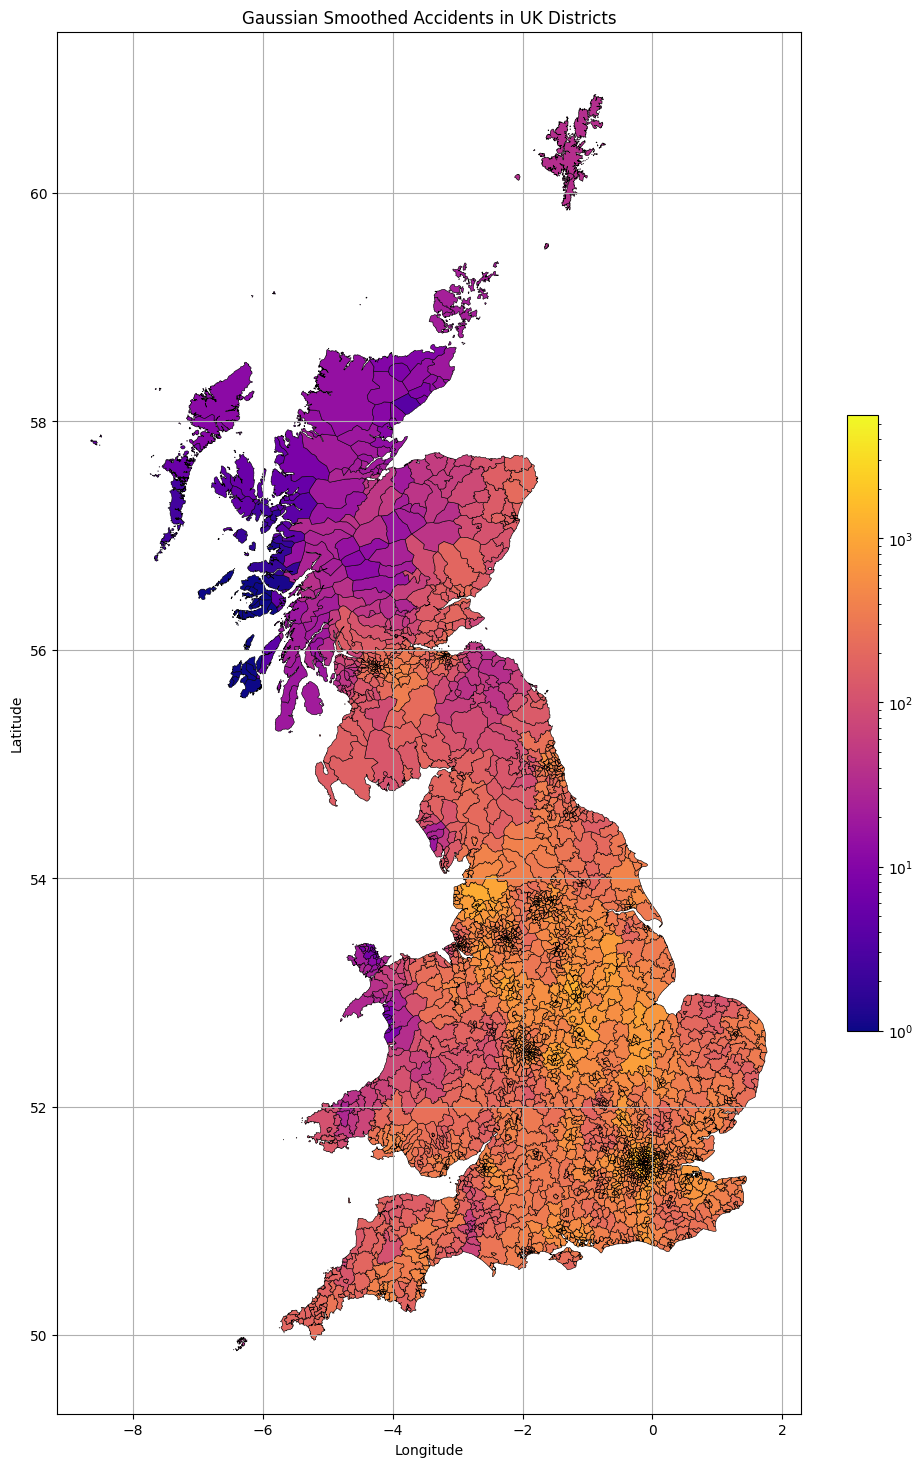

In [82]:
from matplotlib.colors import LogNorm
colormap = plt.cm.plasma
# Apply LogNorm to the colormap normalization
fig, ax = plt.subplots(figsize=(12, 20))
gdf.plot(column='Smoothed_accidents2', cmap=colormap, edgecolor='black', linewidth=0.4, ax=ax, norm=LogNorm(vmin=10, vmax=vmax))

sm = matplotlib.cm.ScalarMappable(cmap=colormap, norm=LogNorm(vmin=1, vmax=vmax))
sm.set_array(gdf['Smoothed_accidents2'])
fig.colorbar(sm, ax=ax, shrink=0.4)
plt.title('Gaussian Smoothed Accidents in UK Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [83]:
# smoothed values 3
# Apply spatial smoothing to the Total_accidents
values = gdf['Total_accidents'].values
smoothed_values6 = spatial_smoothing_gaussian(values, centroids, k=20, bandwidth=2)
gdf['Smoothed_accidents6'] = smoothed_values6

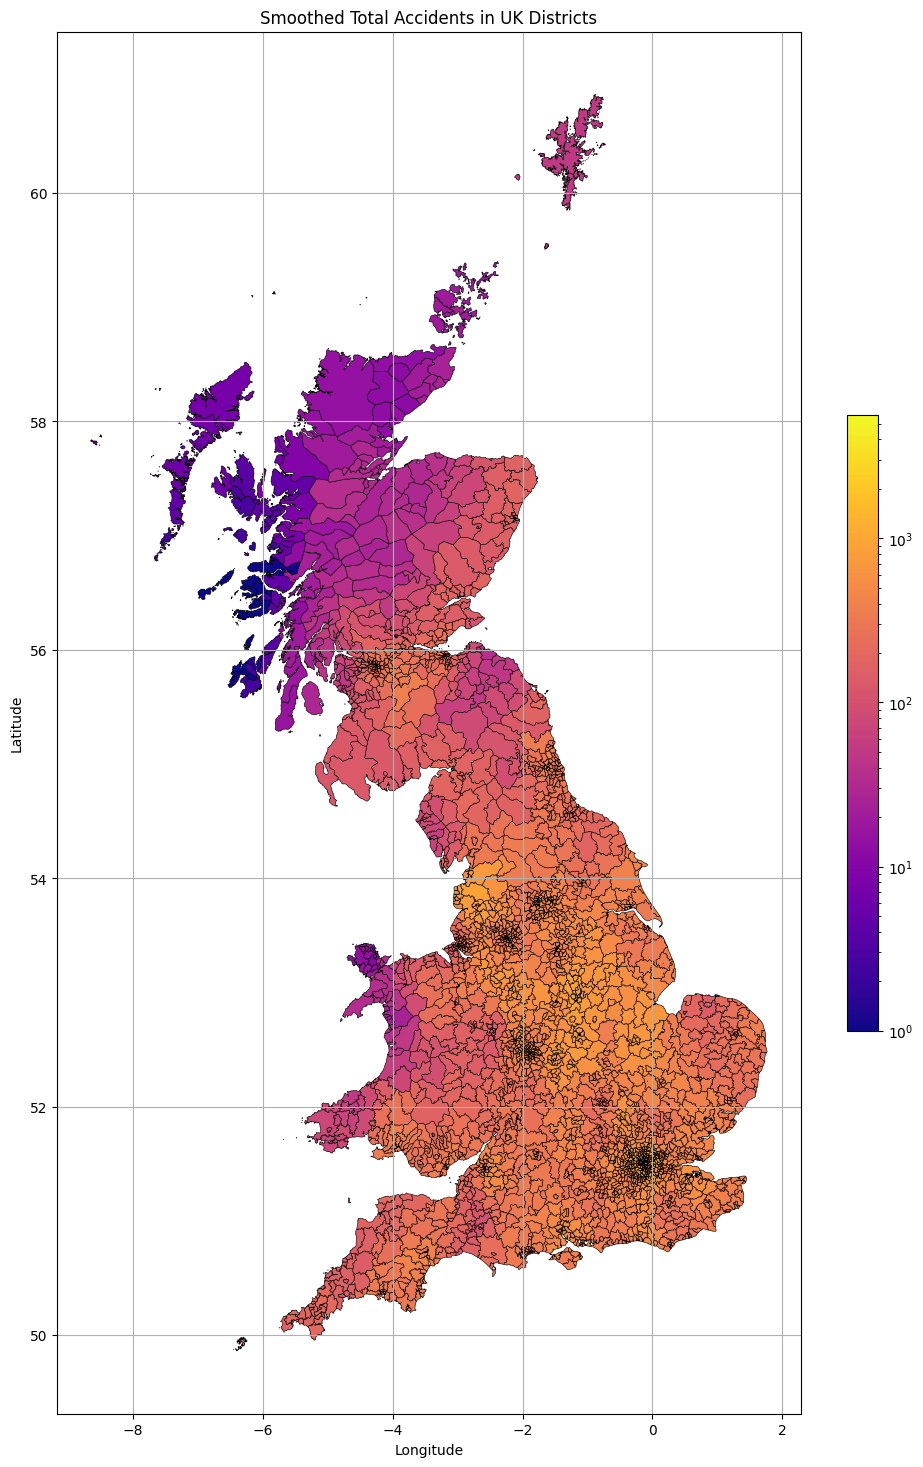

In [84]:
from matplotlib.colors import LogNorm
colormap = plt.cm.plasma
# Apply LogNorm to the colormap normalization
fig, ax = plt.subplots(figsize=(12, 20))
gdf.plot(column='Smoothed_accidents6', cmap=colormap, edgecolor='black', linewidth=0.4, ax=ax, norm=LogNorm(vmin=10, vmax=vmax))

sm = matplotlib.cm.ScalarMappable(cmap=colormap, norm=LogNorm(vmin=1, vmax=vmax))
sm.set_array(gdf['Smoothed_accidents6'])
fig.colorbar(sm, ax=ax, shrink=0.4)
plt.title('Smoothed Total Accidents in UK Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

### Results Post Spatial Smoothing

In [85]:
acc_by_area

name  Total_accidents  Percentage
0     AB10              545    0.026632
1     AB11              586    0.028635
2     AB12              625    0.030541
3     AB13               23    0.001124
4     AB14               46    0.002248
...    ...              ...         ...
2796   YO8             1159    0.056636
2797  YO90               11    0.000538
2798   ZE1              137    0.006695
2799   ZE2              243    0.011874
2800   ZE3               16    0.000782

[2801 rows x 3 columns]

# Clustering smooth with weights and without weights

In [86]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [88]:
gdf

name                                           geometry  Area  \
0     AB10  POLYGON ((-2.11645 57.14656, -2.11655 57.14663...  AB10   
1     AB11  MULTIPOLYGON (((-2.05257 57.13426, -2.05729 57...  AB11   
2     AB12  MULTIPOLYGON (((-2.12807 57.03684, -2.12986 57...  AB12   
3     AB13  POLYGON ((-2.26153 57.10694, -2.27015 57.11525...  AB13   
4     AB14  POLYGON ((-2.26153 57.10694, -2.26315 57.10619...  AB14   
...    ...                                                ...   ...   
2875  YO90  MULTIPOLYGON (((-1.08958 53.95931, -1.08891 53...  YO90   
2876  YO91  POLYGON ((-1.0653 53.97796, -1.06634 53.9783, ...   NaN   
2877   ZE1  MULTIPOLYGON (((-1.17282 60.12108, -1.18797 60...   ZE1   
2878   ZE2  MULTIPOLYGON (((-0.8021 60.40932, -0.80233 60....   ZE2   
2879   ZE3  MULTIPOLYGON (((-1.3806 59.88701, -1.37423 59....   ZE3   

      Total_accidents  bins                   centroid  Smoothed_accidents  \
0               545.0     2  POINT (-2.12625 57.13012)               436.2   
1               586.0     2   POINT (-2.0814 57.13884)               436.2   
2               625.0     2  POINT (-2.16191 57.08609)               424.8   
3                23.0     1  POINT (-2.24511 57.11145)               329.2   
4                46.0     1  POINT (-2.29575 57.10751)               272.8   
...               ...   ...                        ...                 ...   
2875             11.0     1   POINT (-1.08787 53.9591)               426.6   
2876              0.0     1  POINT (-1.06575 53.97826)               401.2   
2877            137.0     1  POINT (-1.22825 60.15188)               131.2   
2878            243.0     1  POINT (-1.25351 60.38858)               131.2   
2879             16.0     1  POINT (-1.29831 59.88171)               131.2   

      Smoothed_accidents2  Smoothed_accidents6  
0              432.109762           433.352194  
1              432.012776           433.437859  
2              397.190132           415.670981  
3              395.700861           415.714860  
4              383.452693           415.697951  
...                   ...                  ...  
2875           588.299746           667.858511  
2876           588.285588           599.901617  
2877           133.389875           185.257980  
2878           136.535540           174.467620  
2879           140.489333           193.750080  

[2880 rows x 9 columns]

In [98]:
gdf[["name"]]

name
0     AB10
1     AB11
2     AB12
3     AB13
4     AB14
...    ...
2875  YO90
2876  YO91
2877   ZE1
2878   ZE2
2879   ZE3

[2880 rows x 1 columns]

In [131]:
## clustering smooth values without weights
X1 = gdf[["Smoothed_accidents"]].values

# Determine optimal clusters (assume K=4 based on elbow analysis)
kmeans_X1 = KMeans(n_clusters=4, random_state=42)
gdf["Cluster_Label_unweighted"] = kmeans_X1.fit_predict(X1)

In [132]:
# Evaluate clustering performance
sil_score_X1 = silhouette_score(X1, gdf["Cluster_Label_unweighted"])
db_score_X1 = davies_bouldin_score(X1, gdf["Cluster_Label_unweighted"])

print(f"Silhouette Score: {sil_score_X1:.2f}")
print(f"Davies-Bouldin Index: {db_score_X1:.2f}")

Silhouette Score: 0.54
Davies-Bouldin Index: 0.52


In [133]:
gdf.head(3)

name                                           geometry  Area  \
0  AB10  POLYGON ((-2.11645 57.14656, -2.11655 57.14663...  AB10   
1  AB11  MULTIPOLYGON (((-2.05257 57.13426, -2.05729 57...  AB11   
2  AB12  MULTIPOLYGON (((-2.12807 57.03684, -2.12986 57...  AB12   

   Total_accidents  bins                   centroid  Smoothed_accidents  \
0            545.0     2  POINT (-2.12625 57.13012)               436.2   
1            586.0     2   POINT (-2.0814 57.13884)               436.2   
2            625.0     2  POINT (-2.16191 57.08609)               424.8   

   Smoothed_accidents2  Smoothed_accidents6  Cluster_Label_unweighted  \
0           432.109762           433.352194                         1   
1           432.012776           433.437859                         1   
2           397.190132           415.670981                         1   

   Cluster_Label_weighted  
0                       1  
1                       1  
2                       1

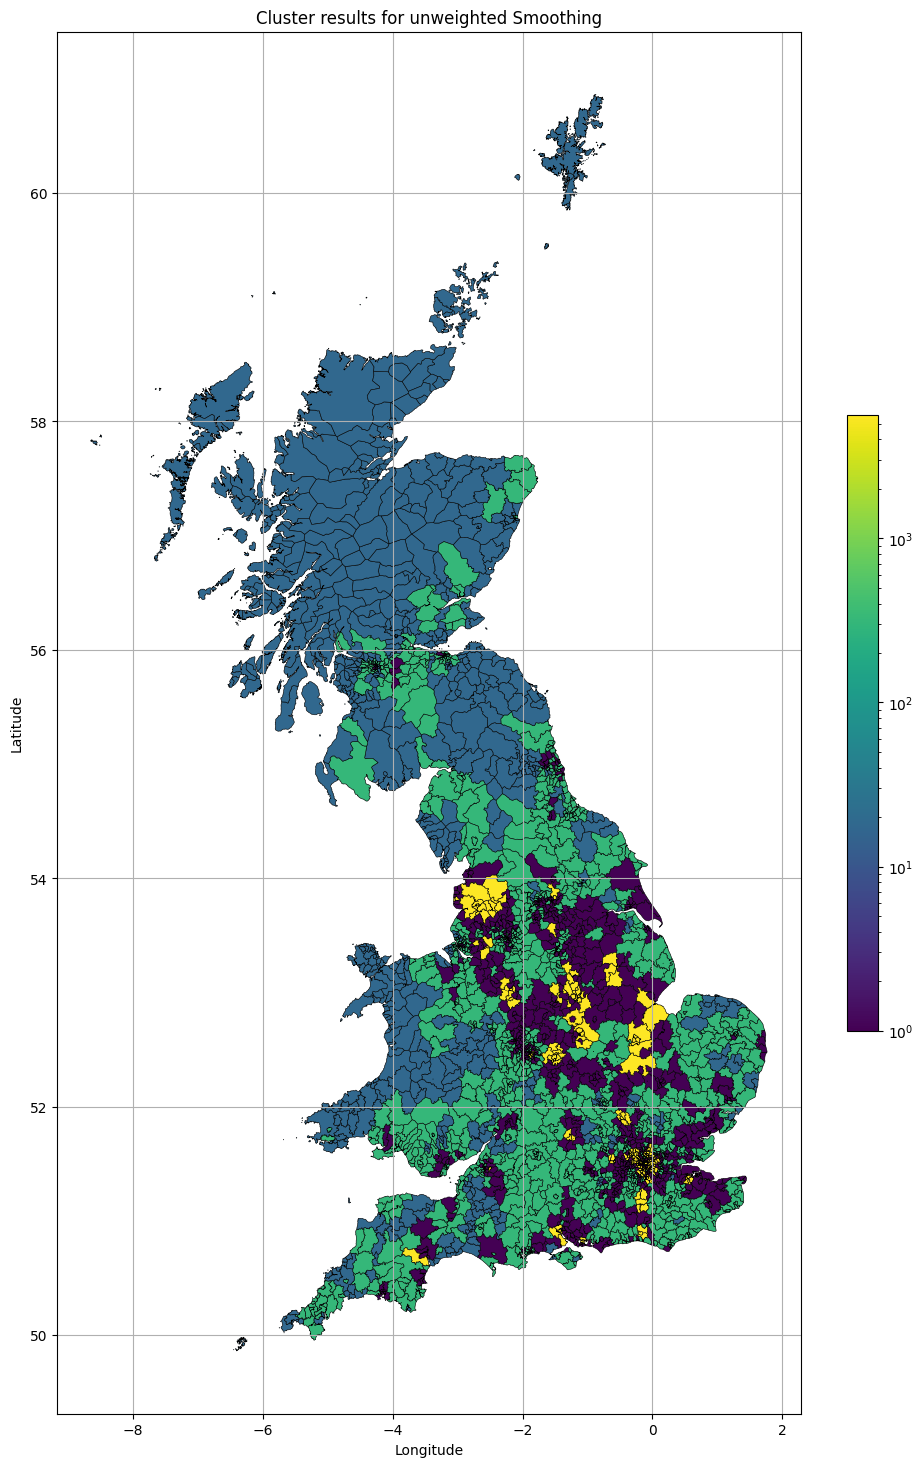

In [134]:
#from matplotlib.colors import LogNorm
colormap = plt.cm.viridis
# Apply LogNorm to the colormap normalization
fig, ax = plt.subplots(figsize=(12, 20))
gdf.plot(column='Cluster_Label_unweighted', cmap=colormap, edgecolor='black', linewidth=0.4, ax=ax)

sm = matplotlib.cm.ScalarMappable(cmap=colormap, norm=LogNorm(vmin=1, vmax=vmax))
sm.set_array(gdf['Cluster_Label_unweighted'])
fig.colorbar(sm, ax=ax, shrink=0.4)
plt.title('Cluster results for unweighted Smoothing')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [124]:
## clustering smooth values with weighting
X2 = gdf[["Smoothed_accidents6"]].values

# Determine optimal clusters (assume K=3 based on elbow analysis)
kmeans_X2 = KMeans(n_clusters=3, random_state=42)
gdf["Cluster_Label_weighted"] = kmeans_X2.fit_predict(X2)

In [125]:
# Evaluate clustering performance
sil_score_X2 = silhouette_score(X2, gdf["Cluster_Label_weighted"])
db_score_X2 = davies_bouldin_score(X2, gdf["Cluster_Label_weighted"])

print(f"Silhouette Score: {sil_score_X2:.2f}")
print(f"Davies-Bouldin Index: {db_score_X2:.2f}")

Silhouette Score: 0.55
Davies-Bouldin Index: 0.57


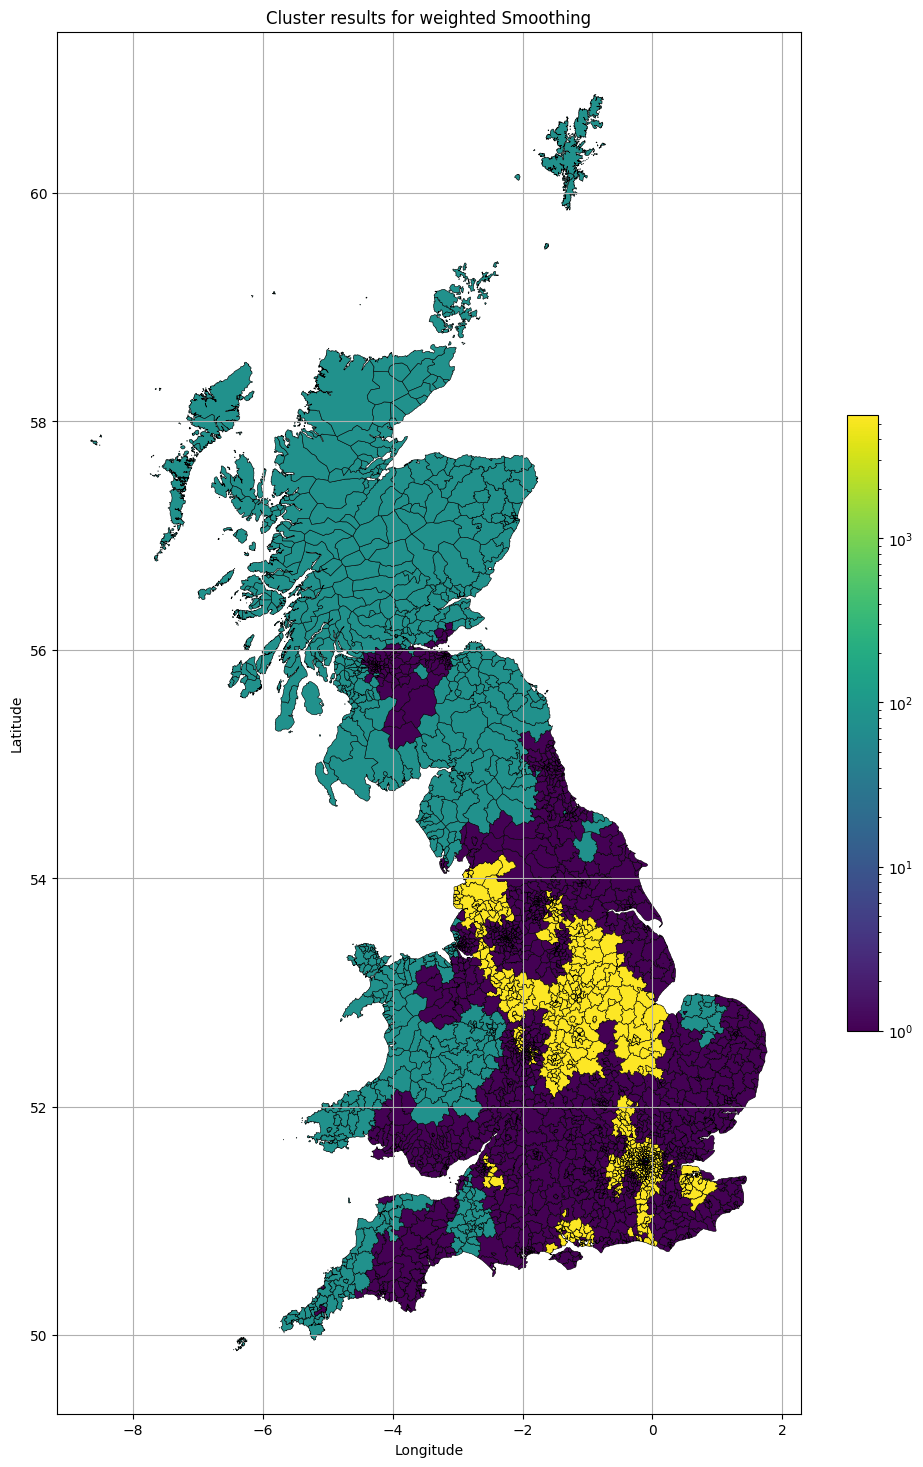

In [126]:
#from matplotlib.colors import LogNorm
colormap = plt.cm.viridis
# Apply LogNorm to the colormap normalization
fig, ax = plt.subplots(figsize=(12, 20))
gdf.plot(column='Cluster_Label_weighted', cmap=colormap, edgecolor='black', linewidth=0.4, ax=ax)

sm = matplotlib.cm.ScalarMappable(cmap=colormap, norm=LogNorm(vmin=1, vmax=vmax))
sm.set_array(gdf['Cluster_Label_weighted'])
fig.colorbar(sm, ax=ax, shrink=0.4)
plt.title('Cluster results for weighted Smoothing')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()